In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.drop('Serial No.',axis=1, inplace=True)

In [8]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [17]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [27]:
model = Sequential()

model.add(Dense(7,activation='relu', input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [30]:
history = model.fit(X_train_scaled,y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 0s 11ms/step - loss: 0.8984 - val_loss: 0.8961
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7475 - val_loss: 0.7370
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6052 - val_loss: 0.5989
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4957 - val_loss: 0.4938
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4061 - val_loss: 0.4036
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3304 - val_loss: 0.3214
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2606 - val_loss: 0.2497
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2010 - val_loss: 0.1871
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1481 - val_loss: 0.1348
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1041 - val_loss: 0.0913
Epoch 11

10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0047
Epoch 84/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0047
Epoch 85/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0047
Epoch 86/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 87/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 88/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 89/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 90/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 91/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 92/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 93/100


In [31]:
pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 1ms/step


In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(y_test,pred)

0.765941149773281

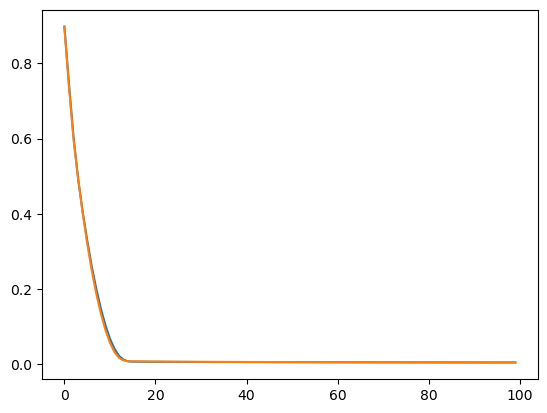

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])